### 1. Import the necessary libraries

In [1]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from collections import Counter
import operator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 345
from wordcloud import WordCloud, STOPWORDS

### 2. Fetch the dataset

In [2]:
def load_file(file_path):
    text = ''.join([line for line in open(file_path, encoding='utf-8')])
    return text

path = '/Users/kaylanguyen/Documents/TheNLPWorkshop/Activities/text_corpus.txt'
text_corpus = load_file(path)

In [3]:
print(text_corpus)

New Zealand players Jesse Tashkoff and Joey Field won hearts on Wednesday after they helped carry injured West Indies batsman Kirk McKenzie off the field during their U-19 World Cup quarterfinal.

McKenzie was suffering from cramps on his leg and was forced to retire hurt on 99, but courageously decided to return to face the final 14 deliveries of the innings after West Indies had lost their ninth wicket.

After struggling to hobble back to the middle, however, he was dismissed first ball -- still one short of his century.

Cue the intervention of the sportsmanlike Kiwi duo, who carried the badly-cramped McKenzie off the field while being applauded back to the pavilion by the fans at Benoni's Willowmoore Park in South Africa.

The gesture was applauded by the cricketing fraternity with India vice-captain Rohit Sharma also praising the New Zealand players.

"So good to see this #SpiritOfCricket at its best," Rohit tweeted along with the video of the incident.

@ImRo45
 So good to see th

### 3. Perform the preprocessing steps, such as text cleaning, tokenization, and lemmatization, on the fetched data.

In [4]:
def clean_text(sentence):
    return re.sub(r'([^\s\w]|_)+', ' ', sentence).split()

In [5]:
tokenized_text = clean_text(text_corpus)
print(tokenized_text[:20])

['New', 'Zealand', 'players', 'Jesse', 'Tashkoff', 'and', 'Joey', 'Field', 'won', 'hearts', 'on', 'Wednesday', 'after', 'they', 'helped', 'carry', 'injured', 'West', 'Indies', 'batsman']


In [6]:
lemmatizer = WordNetLemmatizer()
def get_lemmas(tokenized_text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokenized_text]
lemmatized_text = get_lemmas(tokenized_text)
print(lemmatized_text)

['New', 'Zealand', 'player', 'Jesse', 'Tashkoff', 'and', 'Joey', 'Field', 'won', 'heart', 'on', 'Wednesday', 'after', 'they', 'helped', 'carry', 'injured', 'West', 'Indies', 'batsman', 'Kirk', 'McKenzie', 'off', 'the', 'field', 'during', 'their', 'U', '19', 'World', 'Cup', 'quarterfinal', 'McKenzie', 'wa', 'suffering', 'from', 'cramp', 'on', 'his', 'leg', 'and', 'wa', 'forced', 'to', 'retire', 'hurt', 'on', '99', 'but', 'courageously', 'decided', 'to', 'return', 'to', 'face', 'the', 'final', '14', 'delivery', 'of', 'the', 'inning', 'after', 'West', 'Indies', 'had', 'lost', 'their', 'ninth', 'wicket', 'After', 'struggling', 'to', 'hobble', 'back', 'to', 'the', 'middle', 'however', 'he', 'wa', 'dismissed', 'first', 'ball', 'still', 'one', 'short', 'of', 'his', 'century', 'Cue', 'the', 'intervention', 'of', 'the', 'sportsmanlike', 'Kiwi', 'duo', 'who', 'carried', 'the', 'badly', 'cramped', 'McKenzie', 'off', 'the', 'field', 'while', 'being', 'applauded', 'back', 'to', 'the', 'pavilion', '

### 4. Create a set of unique words along with their frequencies for the 50 most frequently occuring words.

In [7]:
# def get_frequency(corpus, n):
#     token_count_di = Counter(corpus)
#     return token_count_di.most_common(n)

In [8]:
def get_freq(lemmatized_text):
    freq_dict = {}
    for t in lemmatized_text:
        freq_dict[t.strip()] = freq_dict.get(t.strip(), 0) + 1
    return freq_dict

In [9]:
freq_dict = get_freq(lemmatized_text)
print(freq_dict)

{'New': 5, 'Zealand': 5, 'player': 2, 'Jesse': 1, 'Tashkoff': 1, 'and': 8, 'Joey': 3, 'Field': 5, 'won': 1, 'heart': 1, 'on': 6, 'Wednesday': 1, 'after': 2, 'they': 1, 'helped': 1, 'carry': 1, 'injured': 1, 'West': 3, 'Indies': 3, 'batsman': 1, 'Kirk': 1, 'McKenzie': 4, 'off': 2, 'the': 28, 'field': 2, 'during': 1, 'their': 3, 'U': 2, '19': 2, 'World': 2, 'Cup': 2, 'quarterfinal': 1, 'wa': 4, 'suffering': 1, 'from': 1, 'cramp': 1, 'his': 2, 'leg': 1, 'forced': 1, 'to': 12, 'retire': 1, 'hurt': 1, '99': 2, 'but': 1, 'courageously': 1, 'decided': 1, 'return': 1, 'face': 2, 'final': 3, '14': 1, 'delivery': 1, 'of': 8, 'inning': 1, 'had': 1, 'lost': 1, 'ninth': 1, 'wicket': 4, 'After': 1, 'struggling': 1, 'hobble': 1, 'back': 2, 'middle': 1, 'however': 1, 'he': 1, 'dismissed': 1, 'first': 1, 'ball': 2, 'still': 1, 'one': 1, 'short': 1, 'century': 1, 'Cue': 1, 'intervention': 1, 'sportsmanlike': 1, 'Kiwi': 1, 'duo': 1, 'who': 2, 'carried': 1, 'badly': 1, 'cramped': 1, 'while': 2, 'being': 2

In [10]:
def get_top_n_words(freq_dict, n):
    sorted_dict = sorted(freq_dict.items(), key=operator.itemgetter(1), reverse=True)
    return [x[0] for x in sorted_dict][:n]
top_keywords = get_top_n_words(freq_dict, 50)
top_keywords

['the',
 'to',
 'and',
 'of',
 'on',
 'New',
 'Zealand',
 'Field',
 'in',
 'with',
 'McKenzie',
 'wa',
 'wicket',
 'by',
 's',
 'Clarke',
 'Joey',
 'West',
 'Indies',
 'their',
 'final',
 'at',
 'The',
 'SpiritOfCricket',
 'it',
 '2',
 'unbeaten',
 'player',
 'after',
 'off',
 'field',
 'U',
 '19',
 'World',
 'Cup',
 'his',
 '99',
 'face',
 'back',
 'ball',
 'who',
 'while',
 'being',
 'applauded',
 'South',
 'Africa',
 'Rohit',
 'also',
 'So',
 'good']

### 5. Create a word cloud for these top 50 words.

In [11]:
def load_stop_words():
    #other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI', "n'"]
    stop_words = stopwords.words('english')
    #stop_words.extend(other_stopwords_to_remove)
    stop_words = set(stop_words)
    return stop_words

In [12]:
def generate_word_cloud(text, stopwords):
    wordcloud = WordCloud(width=800, height=800, background_color='white',
                         max_words=50, stopwords=load_stop_words(),
                          min_font_size=10).generate(text)
    return wordcloud    

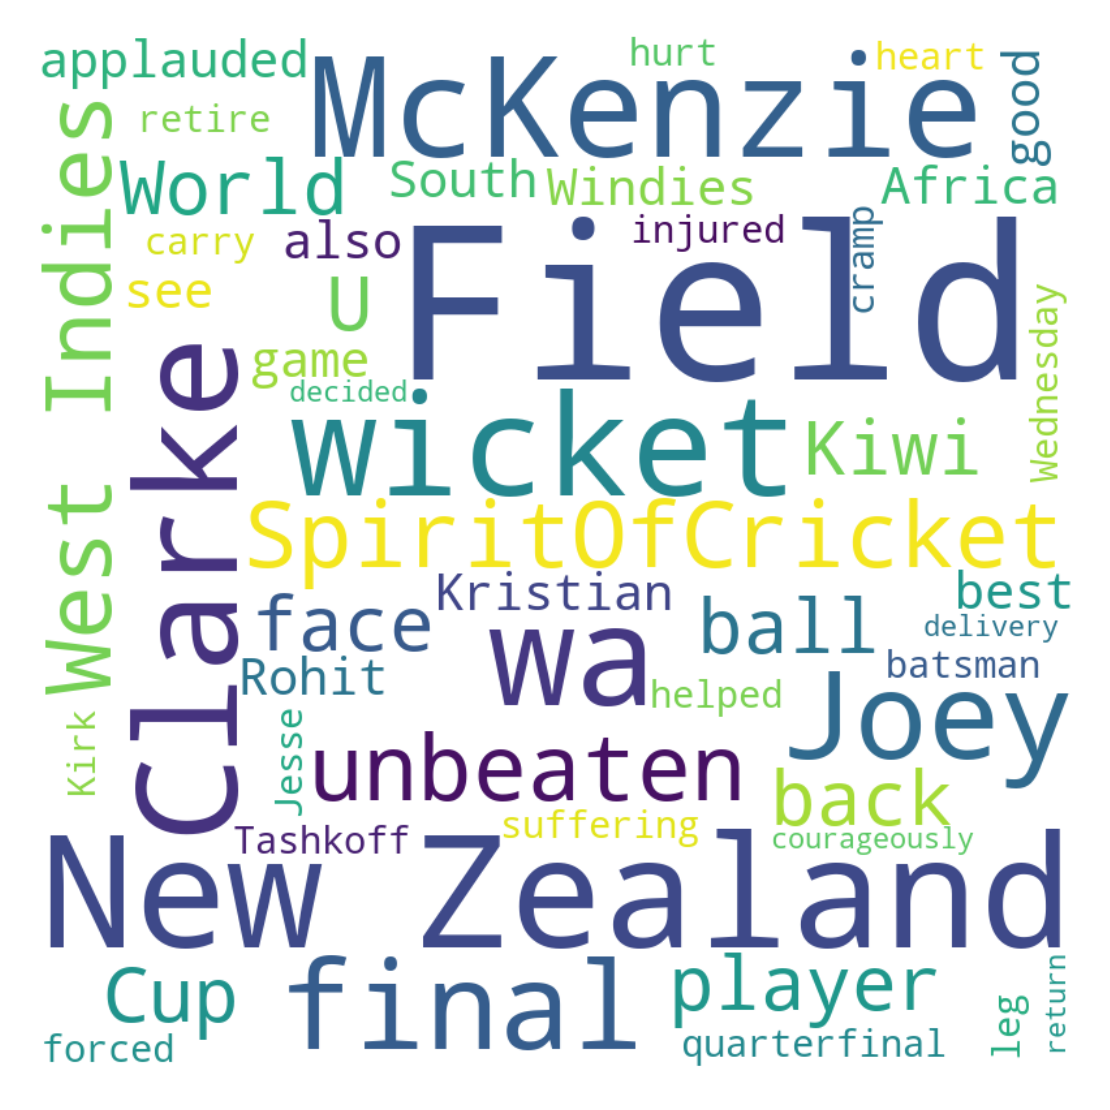

In [13]:
text = ' '.join(lemmatized_text)
stop_words = load_stop_words()
wordcloud = generate_word_cloud(text, stop_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 6. Justify the word cloud by comparing it with the word frequency that you calculated.